# From Text Clustering to Topic Modeling

## 0. Load data

In [3]:
# Load data from Hugging Face
from datasets import load_dataset
dataset = load_dataset("maartengr/arxiv_nlp")["train"]
# Extract metadata
abstracts = dataset["Abstracts"]
titles = dataset["Titles"]

README.md:   0%|          | 0.00/617 [00:00<?, ?B/s]

C:\Users\HP\Miniconda3\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\HP\.cache\huggingface\hub\datasets--maartengr--arxiv_nlp. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For bet

data.csv:   0%|          | 0.00/53.2M [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]

In [47]:
abstracts[0]

'  In this paper Arabic was investigated from the speech recognition problem\npoint of view. We propose a novel approach to build an Arabic Automated Speech\nRecognition System (ASR). This system is based on the open source CMU Sphinx-4,\nfrom the Carnegie Mellon University. CMU Sphinx is a large-vocabulary;\nspeaker-independent, continuous speech recognition system based on discrete\nHidden Markov Models (HMMs). We build a model using utilities from the\nOpenSource CMU Sphinx. We will demonstrate the possible adaptability of this\nsystem to Arabic voice recognition.\n'

In [49]:
titles[0]

'Introduction to Arabic Speech Recognition Using CMUSphinx System'

## 1. Emddeding

In [6]:
from sentence_transformers import SentenceTransformer
# Create an embedding for each abstract
embedding_model = SentenceTransformer("thenlper/gte-small")
embeddings = embedding_model.encode(abstracts, show_progress_bar=True)

modules.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

C:\Users\HP\Miniconda3\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\HP\.cache\huggingface\hub\models--thenlper--gte-small. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/57.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/583 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/66.7M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/394 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/1405 [00:00<?, ?it/s]

In [7]:
embeddings.shape

(44949, 384)

In [12]:
len(embeddings[0])

384

## Dimensionality reduction

In [25]:
!pip install umap-learn


  Using cached umap_learn-0.5.9.post2-py3-none-any.whl.metadata (25 kB)
Using cached umap_learn-0.5.9.post2-py3-none-any.whl (90 kB)


In [34]:
from umap.umap_ import UMAP
# We reduce the input embeddings from 384 dimensions to 5 dimensions
umap_model = UMAP(
n_components=5, min_dist=0.0, metric='cosine', random_state=42
)
reduced_embeddings = umap_model.fit_transform(embeddings)

C:\Users\HP\Miniconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [36]:
embeddings

array([[-8.38182494e-02,  4.16542552e-02,  1.30673414e-02, ...,
         1.21650556e-02, -4.80867643e-03, -4.08200501e-03],
       [-8.71458873e-02,  4.05699350e-02,  1.86350923e-02, ...,
         1.45083414e-02, -4.59623661e-05,  3.18071037e-03],
       [-8.35833475e-02, -1.35176815e-02,  5.27515411e-02, ...,
         6.29818887e-02,  5.36538586e-02, -1.19385347e-02],
       ...,
       [-6.52083084e-02, -4.26614517e-03,  2.71810722e-02, ...,
         3.73920873e-02, -3.73668480e-03, -3.14224744e-03],
       [-5.74976541e-02, -3.33516076e-02, -1.80735649e-03, ...,
        -1.48869092e-02,  1.60427690e-02,  1.20141227e-02],
       [-6.99503347e-02, -7.10754015e-04,  2.52838619e-02, ...,
         4.33816165e-02, -1.36641436e-03,  6.26912806e-04]],
      shape=(44949, 384), dtype=float32)

In [35]:
reduced_embeddings

array([[ 9.720056  ,  0.20557487,  0.16478692,  1.1085002 ,  7.44497   ],
       [ 9.718083  ,  0.19900061,  0.17058742,  1.1312877 ,  7.428245  ],
       [ 9.4316025 ,  0.07219358,  0.31092447,  1.864759  ,  7.3120975 ],
       ...,
       [10.402821  , -0.41867486,  0.0721923 ,  4.3083143 ,  8.796101  ],
       [ 9.876026  , -0.50179315,  0.15965173,  3.2123826 ,  7.5113726 ],
       [10.422022  , -0.40101227,  0.06812166,  4.306067  ,  8.779265  ]],
      shape=(44949, 5), dtype=float32)

## Clustering of embeddings 

In [39]:
from hdbscan import HDBSCAN
# We fit the model and extract the clusters
hdbscan_model = HDBSCAN(
min_cluster_size=50, metric="euclidean", cluster_selection_method="eom"
).fit(reduced_embeddings)
clusters = hdbscan_model.labels_
# How many clusters did we generate?
len(set(clusters))

C:\Users\HP\Miniconda3\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\HP\Miniconda3\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


143

In [42]:
import numpy as np
# Print first three documents in cluster 0
cluster = 0
for index in np.where(clusters==cluster)[0][:3]:
    print(abstracts[index])

  This works aims to design a statistical machine translation from English text
to American Sign Language (ASL). The system is based on Moses tool with some
modifications and the results are synthesized through a 3D avatar for
interpretation. First, we translate the input text to gloss, a written form of
ASL. Second, we pass the output to the WebSign Plug-in to play the sign.
Contributions of this work are the use of a new couple of language English/ASL
and an improvement of statistical machine translation based on string matching
thanks to Jaro-distance.

  Researches on signed languages still strongly dissociate lin- guistic issues
related on phonological and phonetic aspects, and gesture studies for
recognition and synthesis purposes. This paper focuses on the imbrication of
motion and meaning for the analysis, synthesis and evaluation of sign language
gestures. We discuss the relevance and interest of a motor theory of perception
in sign language communication. According to this th

In [43]:
import pandas as pd
# Reduce 384-dimensional embeddings to two dimensions for easier visualization
reduced_embeddings = UMAP(
n_components=2, min_dist=0.0, metric="cosine", random_state=42
).fit_transform(embeddings)
# Create dataframe
df = pd.DataFrame(reduced_embeddings, columns=["x", "y"])
df["title"] = titles
df["cluster"] = [str(c) for c in clusters]
# Select outliers and non-outliers (clusters)
to_plot = df.loc[df.cluster != "-1", :]
outliers = df.loc[df.cluster == "-1", :]

C:\Users\HP\Miniconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


(np.float64(-8.393370294570923),
 np.float64(11.082963609695435),
 np.float64(-6.404884123802185),
 np.float64(11.368280673027039))

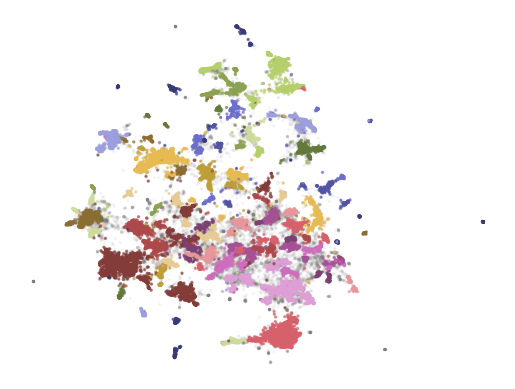

In [46]:
import matplotlib.pyplot as plt
# Plot outliers and non-outliers separately
plt.scatter(outliers.x, outliers_df.y, alpha=0.05, s=2, c="grey")
plt.scatter(
clusters_df.x, clusters_df.y, c=clusters_df.cluster.astype(int),
alpha=0.6, s=2, cmap="tab20b"
)
plt.axis("off")

## BERTopic

In [52]:
from bertopic import BERTopic
# Train our model with our previously defined models
topic_model = BERTopic(
embedding_model=embedding_model,
umap_model=umap_model,
hdbscan_model=hdbscan_model,
verbose=True
).fit(abstracts, embeddings)

2025-11-20 22:07:36,654 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-11-20 22:08:35,650 - BERTopic - Dimensionality - Completed ✓
2025-11-20 22:08:35,654 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-11-20 22:08:41,051 - BERTopic - Cluster - Completed ✓
2025-11-20 22:08:41,074 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-11-20 22:08:50,225 - BERTopic - Representation - Completed ✓


In [53]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,13280,-1_the_of_and_to,"[the, of, and, to, in, we, for, that, language...",[ High-performance neural language models hav...
1,0,2178,0_question_qa_answer_questions,"[question, qa, answer, questions, answering, a...",[ The ability to ask questions is important i...
2,1,2076,1_speech_asr_recognition_end,"[speech, asr, recognition, end, acoustic, audi...",[ End-to-end models have achieved impressive ...
3,2,1329,2_medical_clinical_biomedical_patient,"[medical, clinical, biomedical, patient, notes...",[ A common practice in the medical industry i...
4,3,957,3_translation_nmt_machine_neural,"[translation, nmt, machine, neural, bleu, engl...",[ Neural machine translation (NMT) becomes a ...
...,...,...,...,...,...
138,137,55,137_mixed_code_sentiment_mixing,"[mixed, code, sentiment, mixing, english, anal...",[ The usage of more than one language in the ...
139,138,55,138_propaganda_techniques_news_subtask,"[propaganda, techniques, news, subtask, detect...",[ Propaganda aims at influencing people's min...
140,139,54,139_materials_chemistry_science_chemical,"[materials, chemistry, science, chemical, mate...",[ The amount of data has growing significance...
141,140,54,140_prompt_prompts_optimization_prompting,"[prompt, prompts, optimization, prompting, llm...",[ Prompt optimization aims to find the best p...


In [54]:
topic_model.get_topic_info()["Representative_Docs"]

0      [  High-performance neural language models hav...
1      [  The ability to ask questions is important i...
2      [  End-to-end models have achieved impressive ...
3      [  A common practice in the medical industry i...
4      [  Neural machine translation (NMT) becomes a ...
                             ...                        
138    [  The usage of more than one language in the ...
139    [  Propaganda aims at influencing people's min...
140    [  The amount of data has growing significance...
141    [  Prompt optimization aims to find the best p...
142    [  While there has been significant progress t...
Name: Representative_Docs, Length: 143, dtype: object

In [55]:
topic_model.get_topic(0)

[('question', np.float64(0.022176328901265557)),
 ('qa', np.float64(0.016424312435320616)),
 ('answer', np.float64(0.01631815767000862)),
 ('questions', np.float64(0.016224175363884777)),
 ('answering', np.float64(0.015275911745782198)),
 ('answers', np.float64(0.010118485669342574)),
 ('retrieval', np.float64(0.009878204637710277)),
 ('comprehension', np.float64(0.00796895759123886)),
 ('reading', np.float64(0.007406164228369423)),
 ('the', np.float64(0.006704372086202354))]